In [1]:
# Import libraries and dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [7]:
# os.chdir(os.path.dirname(os.getcwd()))
# os.chdir(os.path.dirname(os.getcwd()))
os.chdir('Data')

In [8]:
odsm = pd.read_csv("od_deaths_merged.csv").iloc[:, 1:]
# odsm

In [9]:
od_dispense = odsm[['Year', 'State', 'State Abv', 'State Code', 'County', 'County Code',
                    'Deaths', 'Population', 'Crude Rate', 'Cruder Rate',
                    'Deathrate per 100', 'Dispense_rate']]
od_dispense = od_dispense[od_dispense['Year'] >= 2006]

<AxesSubplot:>

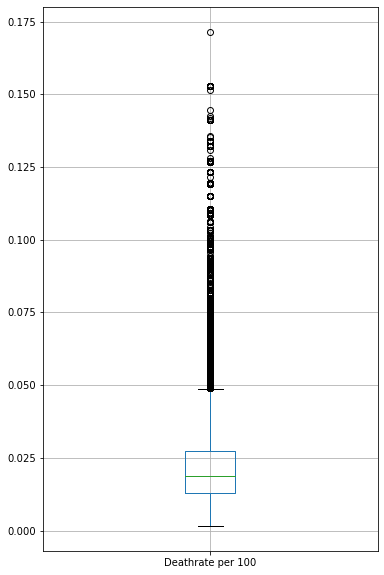

In [121]:
od_dispense.boxplot(column=['Deathrate per 100'], figsize = (6, 10))  

In [27]:
oddis_year = od_dispense.groupby('Year')
oddis_year_means = oddis_year.mean()
years = oddis_year_means.index.values 
oddis_year_means

,State Code,County Code,Deaths,Population,Cruder Rate,Deathrate per 100,Dispense_rate
Year,,,,,,,
2006.0,30.036309,30125.006051,43.388805,347913.352496,15.756374,0.015756,92.066415
2007.0,29.722302,29810.266187,43.421583,340280.787050,16.184708,0.016185,95.457698
2008.0,29.418011,29505.940860,41.411290,325557.427419,16.664888,0.016665,98.283737
2009.0,29.136490,29229.114206,43.087744,334208.793872,16.329976,0.016330,100.278273
2010.0,29.520566,29609.907455,42.068123,320799.798201,18.048078,0.018048,104.834961
2011.0,30.240050,30330.462687,44.151741,316892.825871,18.898084,0.018898,104.139677
2012.0,29.869674,29960.238095,44.847118,321512.358396,18.319839,0.018320,104.281932
2013.0,30.175676,30265.359951,46.781327,320574.276413,18.337875,0.018338,99.049754
2014.0,30.594626,30685.793224,48.343458,310182.310748,20.294289,0.020294,96.348598


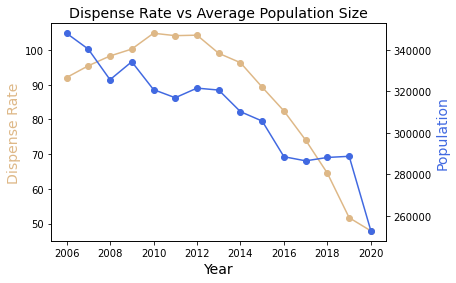

In [12]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(years, oddis_year_means['Dispense_rate'], label = "line 1", color='burlywood', marker='o')
# set x-axis label
ax.set_xlabel("Year",fontsize=14)
# set y-axis label
ax.set_ylabel("Dispense Rate",color='burlywood',fontsize=14)
ax.set_title("Dispense Rate vs Average Population Size", fontsize=14.2)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(years, oddis_year_means['Population'], label = "line 2", color='royalblue', marker='o')
ax2.set_ylabel("Population",color='royalblue',fontsize=14)

plt.show()

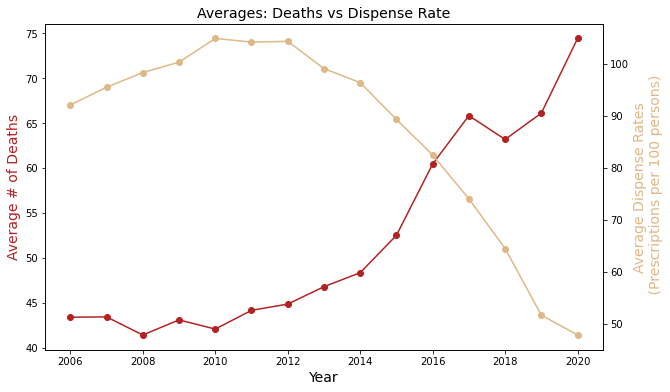

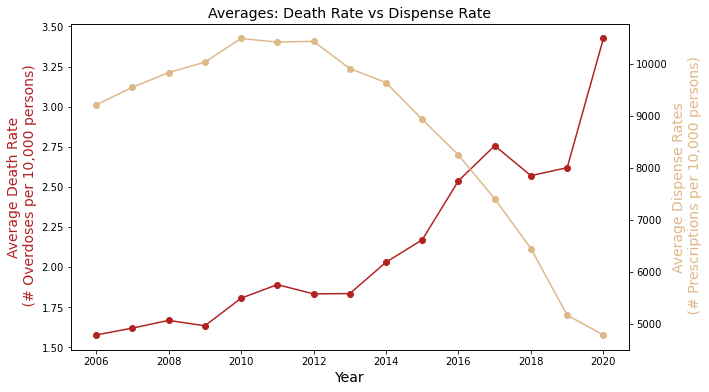

In [120]:
# create figure and axis objects with subplots()
fig,ax =  plt.subplots(figsize=(10,6))
# make a plot
ax.plot(years, oddis_year_means['Deaths'], label = "line 1", color='firebrick', marker='o')
# set x-axis label
ax.set_xlabel("Year",fontsize=14)
# set y-axis label
ax.set_ylabel("Average # of Deaths",color="firebrick",fontsize=14)
ax.set_title("Averages: Deaths vs Dispense Rate", fontsize=14.2)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(years, oddis_year_means['Dispense_rate'], label = "line 2", color='burlywood', marker='o')
ax2.set_ylabel("Average Dispense Rates\n (Prescriptions per 100 persons)",color="burlywood",fontsize=14)

plt.show()


# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(10,6))
# make a plot
ax.plot(years, oddis_year_means['Deathrate per 100'] * 100, label = "line 1", color='firebrick', marker='o')
# set x-axis label
ax.set_xlabel("Year",fontsize=14)
# set y-axis label
ax.set_ylabel("Average Death Rate\n (# Overdoses per 10,000 persons)",color="firebrick",fontsize=14)
ax.set_title("Averages: Death Rate vs Dispense Rate", fontsize=14.2)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(years, oddis_year_means['Dispense_rate'] * 100, label = "line 2", color='burlywood', marker='o')
ax2.set_ylabel("Average Dispense Rates\n (# Prescriptions per 10,000 persons)",color="burlywood",fontsize=14)

plt.show()

In [14]:
od_dispense['Deathrate per 100'].corr(od_dispense['Dispense_rate'])

0.220956043965262

In [17]:
od_dispense['Deaths'].corr(od_dispense['Dispense_rate'])

-0.21609076305933356

In [15]:
od_dispense['Population'].corr(od_dispense['Dispense_rate'])

-0.24264590310987308

In [16]:
od_dispense.groupby('Year')['Dispense_rate'].max()

Year
2006.0    387.5
2007.0    408.7
2008.0    425.5
2009.0    365.1
2010.0    386.0
2011.0    426.4
2012.0    387.2
2013.0    317.1
2014.0    300.1
2015.0    265.2
2016.0    249.7
2017.0    221.4
2018.0    205.3
2019.0    253.9
2020.0    375.6
Name: Dispense_rate, dtype: float64

In [18]:
print(od_dispense['Dispense_rate'].min(), od_dispense['Dispense_rate'].max())

2.0 426.4


In [112]:
dispense_byyear = od_dispense.groupby(['Year', 'County']).agg({'Dispense_rate': 'mean'}).sort_values(('Dispense_rate'), ascending=False)\
   .groupby(level=0)\
   .head(1)\
   .sort_index()
dispense_byyear = dispense_byyear['Dispense_rate'].reset_index()
dispense_byyear['Year'] = dispense_byyear['Year'].astype(int)
dispense_byyear = dispense_byyear.rename({'County': 'Top Dispense Rate County'}, axis=1)
dispense_byyear

,Year,Top Dispense Rate County,Dispense_rate
0,2006,"Pike County, KY",387.5
1,2007,"Pike County, KY",408.7
2,2008,"Mingo County, WV",425.5
3,2009,"Bell County, KY",365.1
4,2010,"Floyd County, KY",386.0
5,2011,"Floyd County, KY",426.4
6,2012,"Floyd County, KY",387.2
7,2013,"Walker County, AL",317.1
8,2014,"Whitley County, KY",300.1
9,2015,"Whitley County, KY",265.2


In [106]:
deathrate_byyear = od_dispense.groupby(['Year', 'County']).agg({'Deathrate per 100': 'mean'}).sort_values(('Deathrate per 100'), ascending=False)\
   .groupby(level=0)\
   .head(1)\
   .sort_index()
deathrate_byyear = deathrate_byyear['Deathrate per 100'].reset_index()
deathrate_byyear['Year'] = deathrate_byyear['Year'].astype(int)
deathrate_byyear = deathrate_byyear.rename({'County': 'Top Deathrate County'}, axis=1)
deathrate_byyear

,Year,Top Deathrate County,Deathrate per 100
0,2006,"St. Bernard Parish, LA",0.084526
1,2007,"McDowell County, WV",0.079135
2,2008,"McDowell County, WV",0.102249
3,2009,"Rockcastle County, KY",0.064425
4,2010,"Powell County, KY",0.126853
5,2011,"Wyoming County, WV",0.132371
6,2012,"Leslie County, KY",0.098478
7,2013,"McDowell County, WV",0.100594
8,2014,"Rio Arriba County, NM",0.100561
9,2015,"McDowell County, WV",0.141165


In [111]:
concat_byyear = pd.concat([dispense_byyear, deathrate_byyear], axis=1, join='inner')
concat_byyear

,Year,Top Dispense Rate County,Dispense_rate,Year,Top Deathrate County,Deathrate per 100
0,2006,"Pike County, KY",387.5,2006,"St. Bernard Parish, LA",0.084526
1,2007,"Pike County, KY",408.7,2007,"McDowell County, WV",0.079135
2,2008,"Mingo County, WV",425.5,2008,"McDowell County, WV",0.102249
3,2009,"Bell County, KY",365.1,2009,"Rockcastle County, KY",0.064425
4,2010,"Floyd County, KY",386.0,2010,"Powell County, KY",0.126853
5,2011,"Floyd County, KY",426.4,2011,"Wyoming County, WV",0.132371
6,2012,"Floyd County, KY",387.2,2012,"Leslie County, KY",0.098478
7,2013,"Walker County, AL",317.1,2013,"McDowell County, WV",0.100594
8,2014,"Whitley County, KY",300.1,2014,"Rio Arriba County, NM",0.100561
9,2015,"Whitley County, KY",265.2,2015,"McDowell County, WV",0.141165
